# 主成分分析

In [13]:
#　モジュールの読み込み
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seabornのスタイルに適用
sns.set()
sns.set_style('whitegrid')

## サンプルデータ生成

In [31]:
#サンプル生成
n_sample = 100

def gene_data(n_sample):
    mean = [0, 0]
    cov = [[2, 0.7], [0.7, 1]]
    # np.random.multivariate_normal() 指定された平均と共分散行列に沿ったランダムな値を生成してくれる関数
    return np.random.multivariate_normal(mean, cov, n_sample)

def plot_data(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

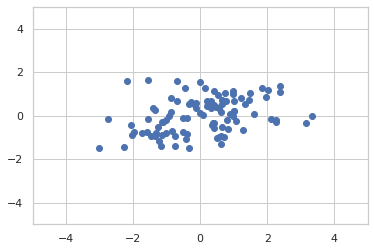

In [32]:
# データ可視化
X = gene_data(n_sample)
plot_data(X)

## 学習

In [33]:
n_components=2

def get_moments(X):
    mean = X.mean(axis=0)
    stan_cov = np.dot((X - mean).T, X - mean) / (len(X) - 1)
    return mean, stan_cov
    
def get_components(eigenvectors, n_components):
    # スライス[,::-1]は後ろから1置きに数字を取り出す。
    W = eigenvectors[:, ::-1][:, :n_components]
    return W.T

def plt_result(X, first, second):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    
    
    # 第１主成分
    # quiver(X, Y, U, V, [C])  X, Yはベクトルの開始点、U, Vはベクトルの成分、Cはベクトルの大きさに応じたカラーマップ上の色をつけるための配列
    plt.quiver(0, 0, first[0], first[1], width=0.01, scale=6, color='magenta')
    # 第２主成分
    plt.quiver(0, 0, second[0], second[1], width=0.01, scale=6, color='chartreuse')

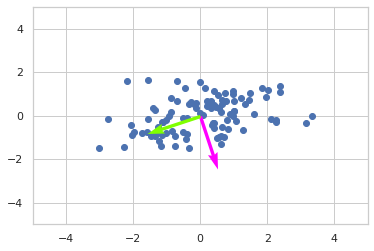

In [34]:
#分散共分散行列を標準化
meean, stan_cov = get_moments(X)
#固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eigh(stan_cov)
components = get_components(eigenvectors, n_components)

plt_result(X, eigenvectors[0, :], eigenvectors[1, :])

## 射影

In [35]:
def transform_by_pca(X, pca):
    mean = X.mean(axis=0)
    return np.dot(X-mean, components)

(-5.0, 5.0)

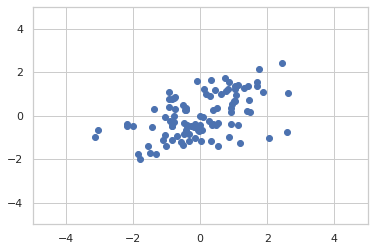

In [36]:
Z = transform_by_pca(X, components.T)
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 逆変換

In [37]:
mean = X.mean(axis=0)
X_ = np.dot(Z, components.T) + mean

(-5.0, 5.0)

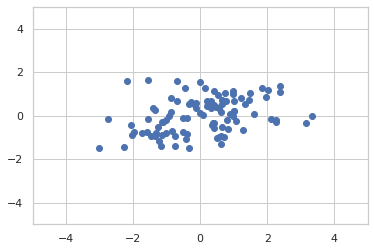

In [38]:
plt.scatter(X_[:, 0], X_[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance())) 

components: [[-0.9495491 -0.3136184]
 [-0.3136184  0.9495491]]
mean: [0.05533279 0.02736413]
covariance: [[1.64333091 0.36214007]
 [0.36214007 0.66647986]]


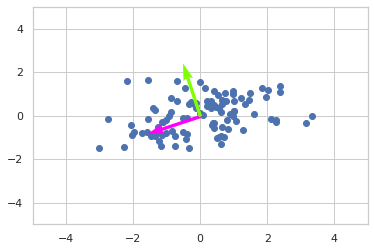

In [41]:
plt_result(X, pca.components_[0, :], pca.components_[1, :])

components: [[-0.9495491 -0.3136184]
 [-0.3136184  0.9495491]]
mean: [0.05533279 0.02736413]
covariance: [[1.64333091 0.36214007]
 [0.36214007 0.66647986]]


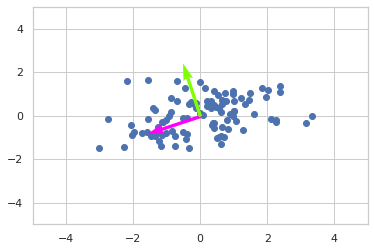

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
plt_result(X, pca.components_[0, :], pca.components_[1, :])

print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance()))